**For this run, we will try to use automation pmdarima**

**run5 use d=0, D=2, seasonal=True, m = 4**

In [1]:
#import all relevant libraries
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import matplotlib
import seaborn as sns
import sklearn
from scipy import stats

In [2]:
# import dataset
df = pd.read_csv('PCG.csv', index_col='StartDate',parse_dates=True)
df

,Year,Month,month week,WeekNum,PCG-BP,PCG-EMI,PCG-P09,PCG-P10,PCG-P15,PCG-P20,PCG-P25,PCG-P26,PCG-SS,PCG-SIN,PCG-SGS,PCG-EFB,PCG-P05
StartDate,,,,,,,,,,,,,,,,,
2013-12-30,2013,12,1,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,2014,1,4,2,2.0,0.0,6.0,1.0,46.0,9.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0
2014-01-13,2014,1,4,3,2.0,0.0,6.0,1.0,46.0,10.0,3.0,10.0,1.0,0.0,0.0,0.0,0.0
2014-01-20,2014,1,4,4,2.0,0.0,6.0,1.0,46.0,9.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0
2014-01-27,2014,1,4,5,3.0,0.0,6.0,1.0,46.0,10.0,3.0,10.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-04,2023,12,4,49,0.0,0.0,0.0,0.0,82.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-11,2023,12,4,50,1.0,0.0,1.0,0.0,82.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-18,2023,12,4,51,0.0,0.0,0.0,0.0,82.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# DATA CLEANING
# drop unrelated column
# df = df.drop([0])

df = df.drop(df.columns[[0,1,2,3]], axis=1)
df = df.fillna(0)    # fill na cells with 0

# remove first and last row due to their insignificant values
df.drop(df.head(1).index,inplace=True) # drop first row
df.drop(df.tail(1).index,inplace=True) # drop last row

df

,PCG-BP,PCG-EMI,PCG-P09,PCG-P10,PCG-P15,PCG-P20,PCG-P25,PCG-P26,PCG-SS,PCG-SIN,PCG-SGS,PCG-EFB,PCG-P05
StartDate,,,,,,,,,,,,,
2014-01-06,2.0,0.0,6.0,1.0,46.0,9.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0
2014-01-13,2.0,0.0,6.0,1.0,46.0,10.0,3.0,10.0,1.0,0.0,0.0,0.0,0.0
2014-01-20,2.0,0.0,6.0,1.0,46.0,9.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0
2014-01-27,3.0,0.0,6.0,1.0,46.0,10.0,3.0,10.0,1.0,0.0,0.0,0.0,0.0
2014-02-03,0.0,0.0,2.0,0.0,22.0,4.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27,2.0,0.0,1.0,0.0,12.0,6.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0
2023-12-04,0.0,0.0,0.0,0.0,82.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-11,1.0,0.0,1.0,0.0,82.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


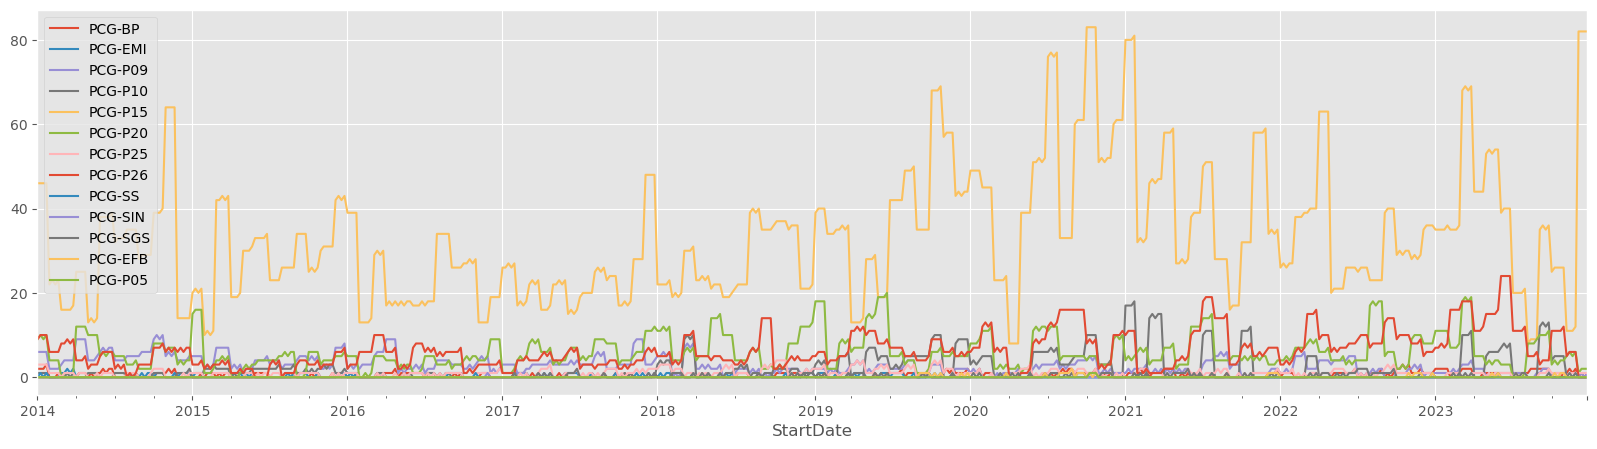

In [4]:
# plot the generaL view

fig, ax1 = plt.subplots(figsize=(20,5))
df.plot(ax=ax1)
plt.show()

**From the above plot, we are focusing on model 'PCG-P15' as our desired model, due to its highest average count**

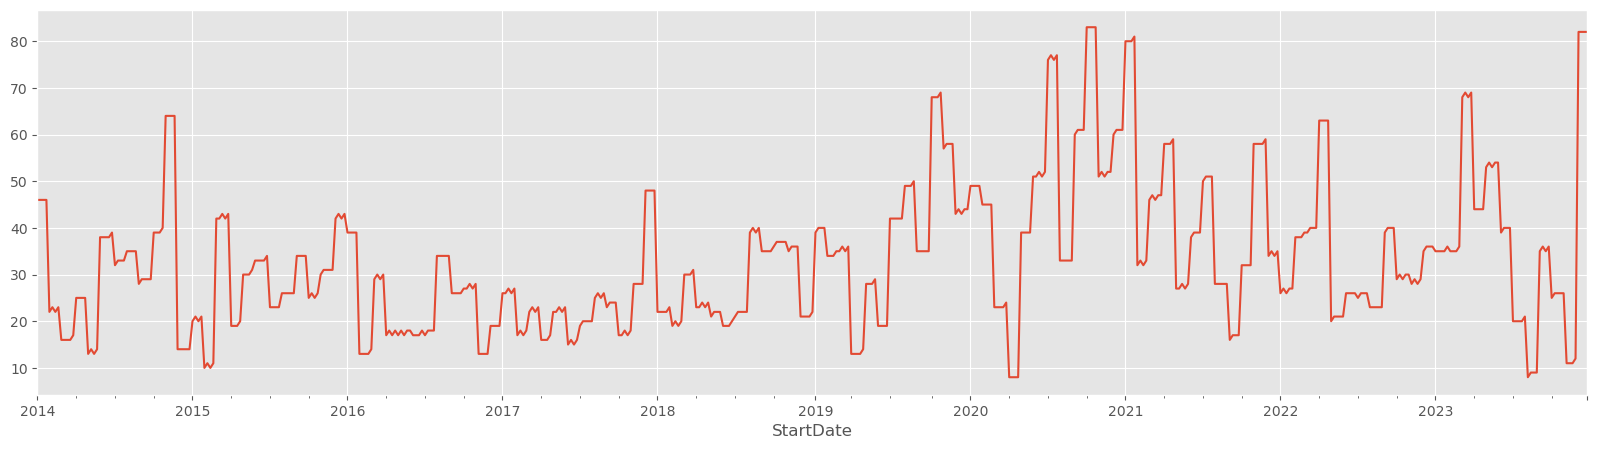

In [5]:
# plot the column 'PCG-P15'

fig, ax1 = plt.subplots(figsize=(20,5))
df['PCG-P15'].plot(ax=ax1)
plt.show()

The 'PCG-P15' plot shows there's no obvious trend and thus is assumed to be stationary.

A few outliers observed from this plot and there's also a possibility of seasonality on a smaller scale for this time-series, which we will further confirmed in the following steps.

In [6]:
# removing outlier using Z-score method for all models

z = np.abs(stats.zscore(df))          # find absolute value of z-score
df_clean = df[(z<3).all(axis=1)]      # only keep rows with z<|3|
df_clean.shape

(438, 13)

In [7]:
df_clean

,PCG-BP,PCG-EMI,PCG-P09,PCG-P10,PCG-P15,PCG-P20,PCG-P25,PCG-P26,PCG-SS,PCG-SIN,PCG-SGS,PCG-EFB,PCG-P05
StartDate,,,,,,,,,,,,,
2014-01-06,2.0,0.0,6.0,1.0,46.0,9.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0
2014-01-20,2.0,0.0,6.0,1.0,46.0,9.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0
2014-02-03,0.0,0.0,2.0,0.0,22.0,4.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0
2014-02-10,0.0,0.0,2.0,0.0,23.0,4.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0
2014-02-17,0.0,0.0,2.0,0.0,22.0,4.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-16,0.0,0.0,1.0,5.0,26.0,3.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0
2023-11-06,1.0,0.0,0.0,0.0,11.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
2023-11-13,2.0,0.0,0.0,0.0,11.0,6.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0


After removing the outliers, there's only 438 rows left for the analysis.

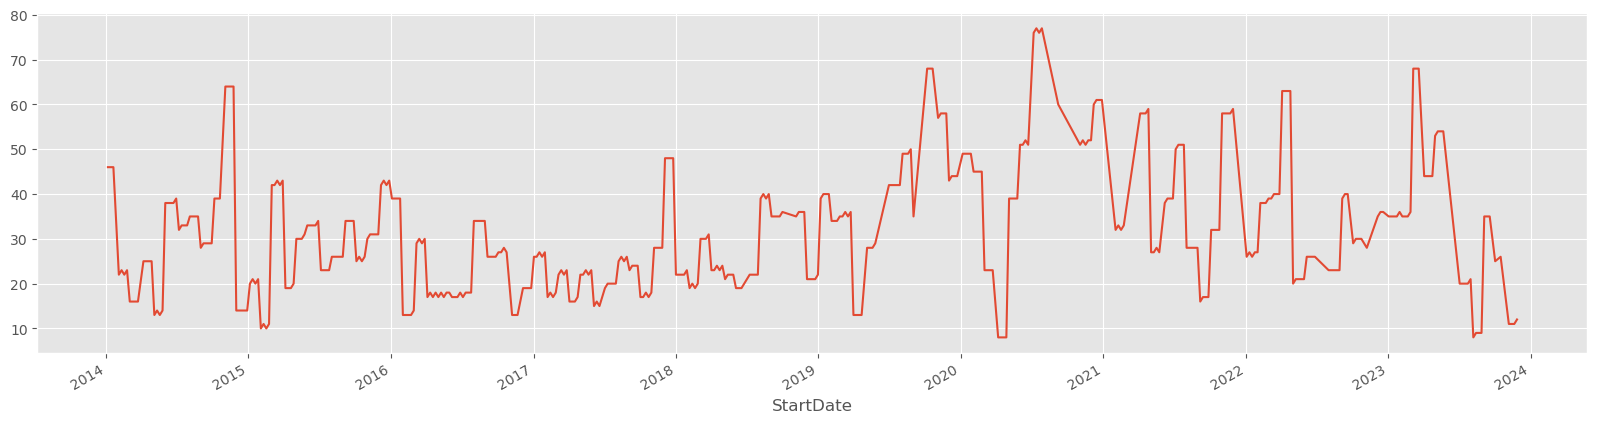

In [8]:
# plot the cleaned 'PCG-P15'

fig, ax1 = plt.subplots(figsize=(20,5))
df_clean['PCG-P15'].plot(ax=ax1)
plt.show()

THE BOX-JENKINS METHOD
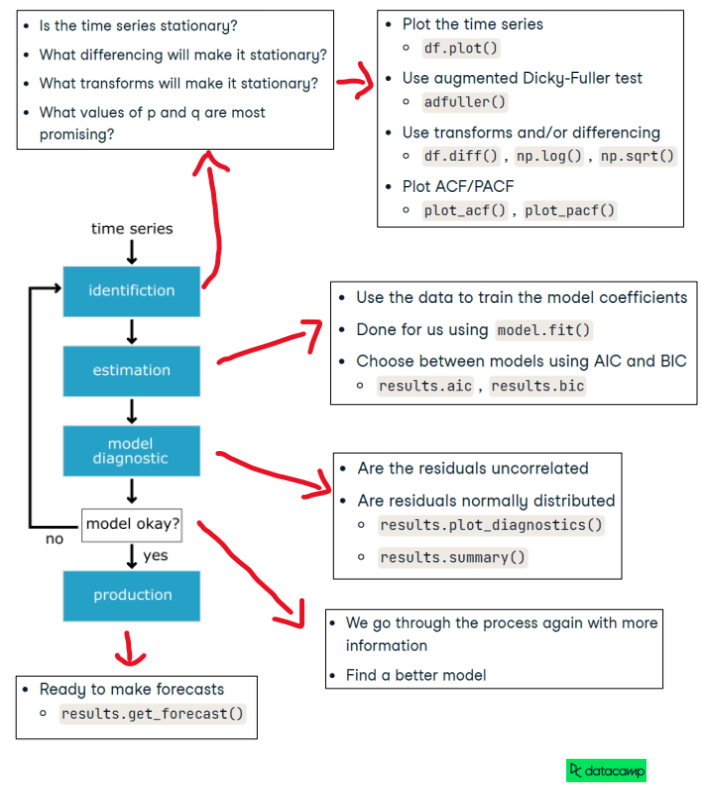

**STEP 1: IDENTIFICATION**

1.1) Test for stationarity

In [9]:
# assign the cleaned selected column 'PCG-P15' into new variable
P15 = df_clean["PCG-P15"]
P15

StartDate
2014-01-06    46.0
2014-01-20    46.0
2014-02-03    22.0
2014-02-10    23.0
2014-02-17    22.0
              ... 
2023-10-16    26.0
2023-11-06    11.0
2023-11-13    11.0
2023-11-20    11.0
2023-11-27    12.0
Name: PCG-P15, Length: 438, dtype: float64

In [10]:
# identify if the time-series is stationary by using Augmented Dickey-Fuller test (ADFT)
# null hypothesis: time-series is non-stationary (p > 0.05)

result_ADF = adfuller(P15)
print(result_ADF)
print('p-value is: ',result_ADF[1])

(-3.1787358143103077, 0.021249001862636688, 18, 419, {'1%': -3.4460536145702383, '5%': -2.868462751982839, '10%': -2.570457599182051}, 2901.681896453503)
p-value is:  0.021249001862636688


Since the p < 0.05, we have to reject the null hypothesis (reject non-stationary).
Thus, our time-series is stationary and no further transformation or differencing is needed (d = 0).

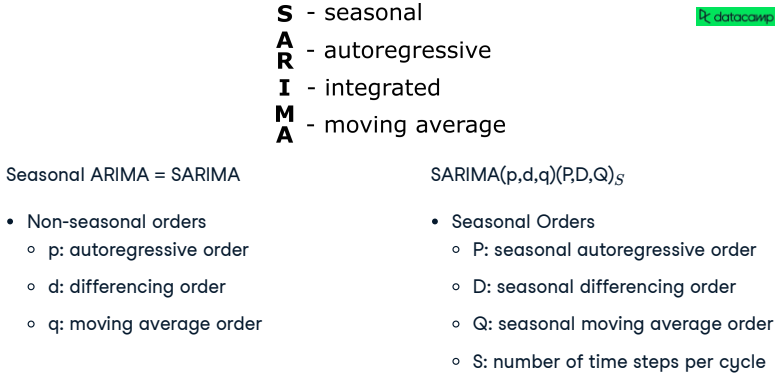

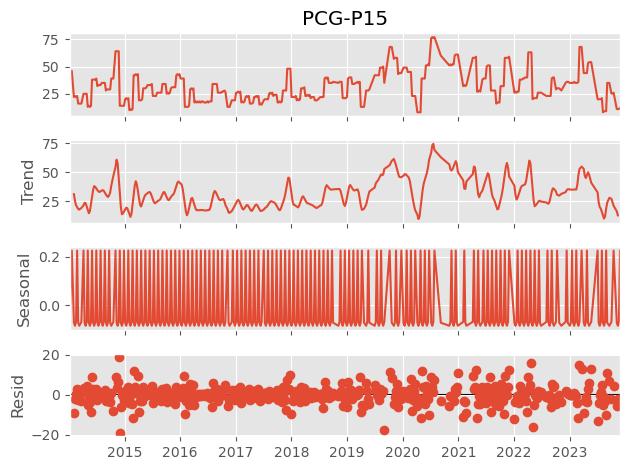

In [11]:
# plot the decomposition of seasonal behavior for the time-series

from statsmodels.tsa.seasonal import seasonal_decompose

decomp_results = seasonal_decompose(P15, period = 4)

# Plot decomposed data
decomp_results.plot()
plt.show()

1.2) Identifying seasonal data using ACF

Despite no obvious trend from the above plot, the seasonal plot however indicates there's exist a seasonal behavior for this time-series.

To confirm this, we are using AutoCorrelation Function (ACF) in order to detect the season cycle.

In [12]:
P15_seasonal = P15 - P15.rolling(4).mean()    # subtract long rolling average over 5 steps
P15_seasonal = P15_seasonal.dropna()          # drop NaN values
P15_seasonal

StartDate
2014-02-10   -11.25
2014-02-17    -6.25
2014-02-24     0.50
2014-03-03    -5.00
2014-03-10    -3.25
              ...  
2023-10-16    -4.25
2023-11-06   -13.25
2023-11-13    -7.25
2023-11-20    -3.75
2023-11-27     0.75
Name: PCG-P15, Length: 435, dtype: float64

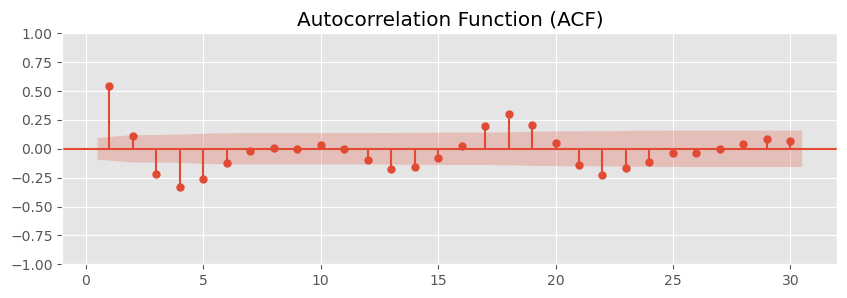

In [13]:
# import ACF/PACF library
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1,1, figsize=(10,3))

# Plot ACF
plot_acf(P15_seasonal, ax=ax, lags = 30, title='Autocorrelation Function (ACF)', zero=False)
plt.show()

Although the earlier plot of 'PCG-P15' did not show obvious seasonal behavior, its ACF plot however shows a periodic correlaction pattern.

Hence, we will use SARIMA model instead of ARIMA model for this time-series due to its seasonality pattern.

**STEP 2: ESTIMATION**

  2.1) Train the model coefficients using model.fit()

In [14]:
# use automation pmdarima to look for non-seasonal and seasonal time-series order

import pmdarima as pm
auto = pm.auto_arima(P15, d=0,                         # the non-seasonality is already stationary
                     start_p=1,
                     start_q=1,
                     max_p=5,
                     max_q=5,
                     seasonal=True,
                     m=14,                             # the seasonality cycle is at every 14
                     D=1,
                     start_P=1,
                     start_Q=1,
                     max_P=5,
                     max_Q=5,
                     information_criterion='aic',
                     trace=True,
                     error_action='ignore',
                     stepwise=True)

print(auto.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[14] intercept   : AIC=inf, Time=2.87 sec
 ARIMA(0,0,0)(0,1,0)[14] intercept   : AIC=3697.851, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[14] intercept   : AIC=3128.019, Time=0.62 sec
 ARIMA(0,0,1)(0,1,1)[14] intercept   : AIC=inf, Time=1.57 sec
 ARIMA(0,0,0)(0,1,0)[14]             : AIC=3695.919, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[14] intercept   : AIC=3267.318, Time=0.23 sec
 ARIMA(1,0,0)(2,1,0)[14] intercept   : AIC=3086.336, Time=2.09 sec
 ARIMA(1,0,0)(3,1,0)[14] intercept   : AIC=3061.026, Time=5.26 sec
 ARIMA(1,0,0)(4,1,0)[14] intercept   : AIC=3033.999, Time=11.64 sec
 ARIMA(1,0,0)(5,1,0)[14] intercept   : AIC=3024.817, Time=14.97 sec
 ARIMA(1,0,0)(5,1,1)[14] intercept   : AIC=inf, Time=44.06 sec
 ARIMA(1,0,0)(4,1,1)[14] intercept   : AIC=inf, Time=18.36 sec
 ARIMA(0,0,0)(5,1,0)[14] intercept   : AIC=3464.732, Time=16.00 sec
 ARIMA(2,0,0)(5,1,0)[14] intercept   : AIC=3023.610, Time=17.52 sec
 ARIMA(2,0,0)(4,1,0)[14] intercep

**STEP 3: MODEL DIAGNOSTIC**

  3.1) Checking for the residual correlation

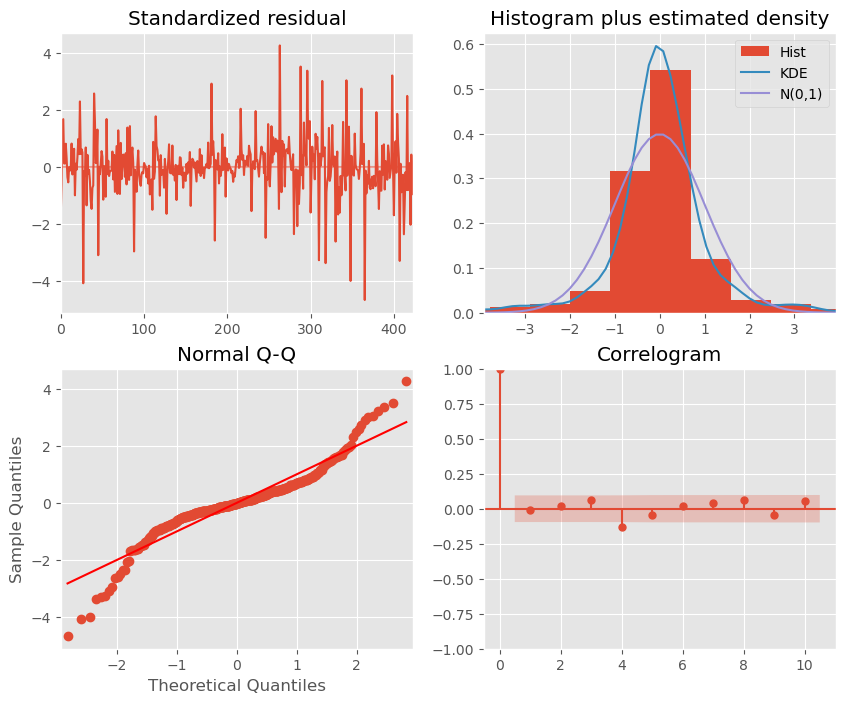

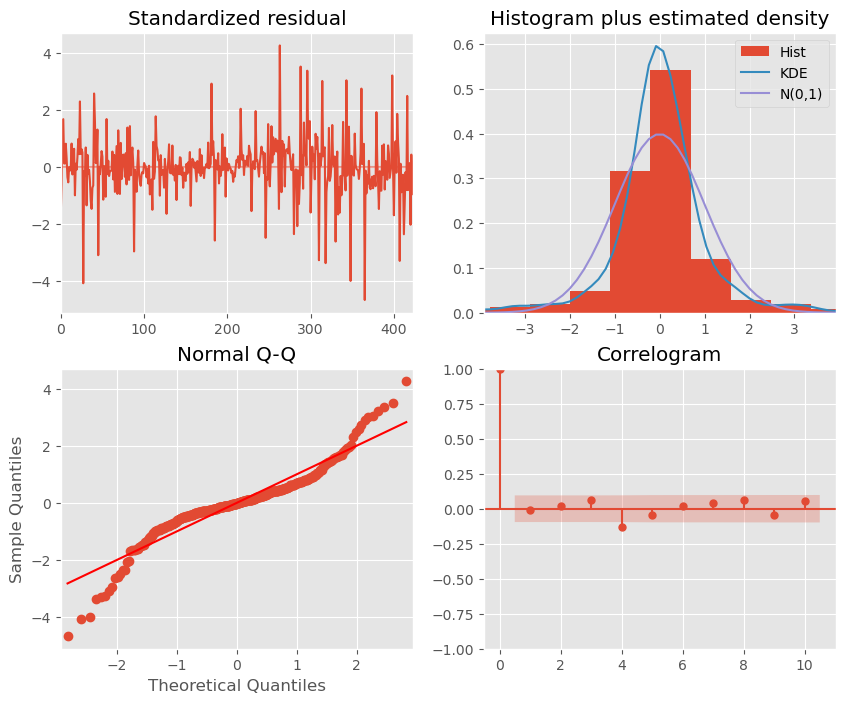

In [15]:
auto.plot_diagnostics(figsize=(10,8))

**Reject current results**

Since Prob(Q): p-value for null hypothesis that residuals are uncorrelated is > 0.05, thus we have to accept the null hypothesis.

And since, Prob(JB) : p-value for null hypothesis that residuals are normal is < 0.05, thus we have to reject the null hypothesis. Hence, the residual is not normal.

From this diagnostics test, we have to re-run the process again with more information, or we might need to find a better model.

**Now we go for the seasonal decomposition of the time-series**

In [16]:
#ARIMA(3,0,0)(4,1,0)[14] ARIMA(2,0,0)(4,1,0)[14] ARIMA(2,0,0)(5,1,0)[14]
#ARIMA(3,0,0)(3,1,0)[14] ARIMA(2,0,2)(2,1,0)[14] ARIMA(2,0,0)(2,2,0)[14]
#ARIMA(2,0,0)(5,2,0)[4] ARIMA(2,0,1)(5,1,0)[4] ARIMA(2,0,1)(5,2,0)[4]
#ARIMA(2,1,1)(5,1,0)[4] ARIMA(0,1,0)(5,1,0)[4]
model = sm.tsa.arima.ARIMA(P15, order=(0,1,0), seasonal_order=(5,1,0,4))
fitted = model.fit()
print(fitted.summary())

C:\Users\PC10\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC10\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC10\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                    
Dep. Variable:                         PCG-P15   No. Observations:                  438
Model:             ARIMA(0, 1, 0)x(5, 1, 0, 4)   Log Likelihood               -1557.054
Date:                         Wed, 31 Jan 2024   AIC                           3126.109
Time:                                 16:41:42   BIC                           3150.533
Sample:                                      0   HQIC                          3135.751
                                         - 438                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L4       -1.0213      0.037    -27.929      0.000      -1.093      -0.950
ar.S.L8       -0.7968      0.052    -15.448      0.000     

**STEP 4: PRODUCTION**

**Forecasting Model**

In [17]:
#import statsmodels
#from statsmodels.tsa.arima.model import ARIMA
#import statsmodels.tsa.arima.model.ARIMAResults.get_prediction

# Create forecast object
forecast_object = fitted.get_prediction(steps=36) #dynamic=True

# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
# conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

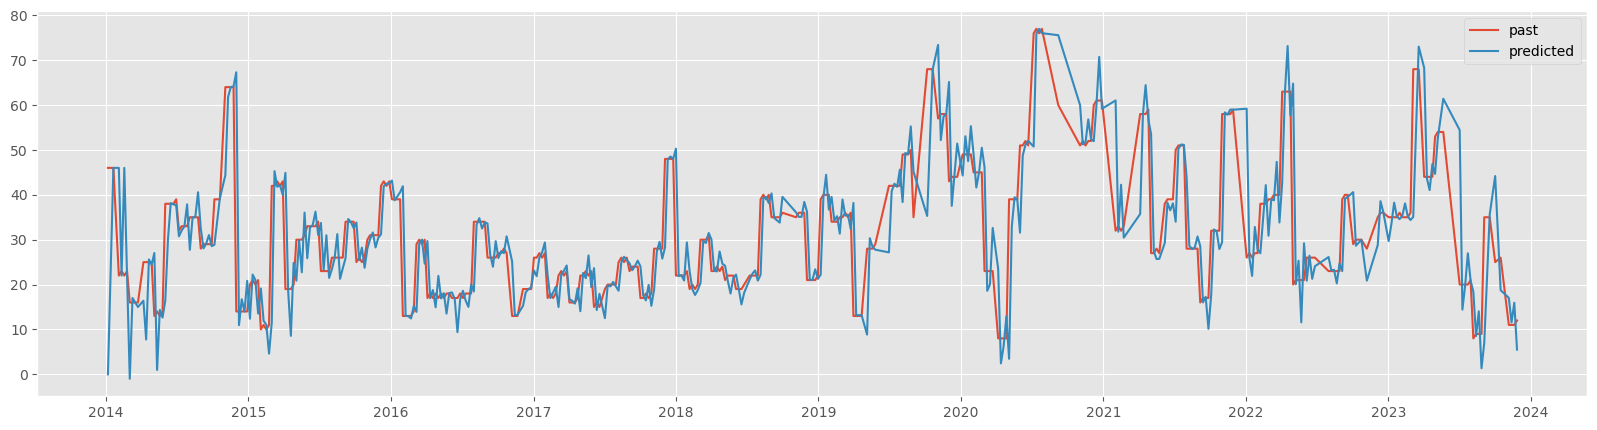

In [18]:
#fig, ax1 = plt.subplots(figsize=(20,5))
#P15.plot(ax=ax1)
#plt.show()

plt.figure(figsize=(20,5))

# Plot past P15 levels
plt.plot(P15.index, P15, label='past')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
#plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

<Axes: xlabel='StartDate'>

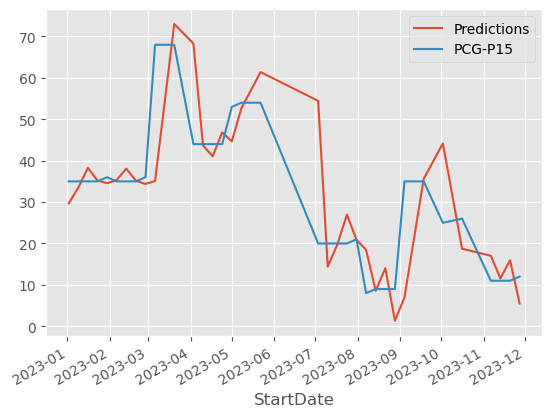

In [19]:
# Split data into train / test sets 
#P15_train = P15.loc[:'2022']
#P15_test = P15.loc['2023':]

train = P15.loc[:'2022'] 
test = P15.loc['2023':] # set one year(12 months) for testing 

start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = fitted.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test.plot(legend = True) 

C:\Users\PC10\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

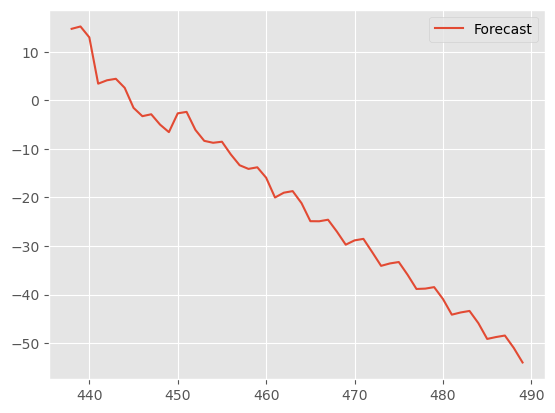

In [20]:
# Train the model on the full dataset 
# model = model = SARIMAX(airline['# Passengers'],  
                        #order = (0, 1, 1),  
                        #seasonal_order =(2, 1, 1, 12)) 
#result = model.fit() 
  
# Forecast for the next 1 year 
forecast = fitted.predict(start = len(P15),  
                          end = (len(P15)-1) + 52,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
#P15.plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True)

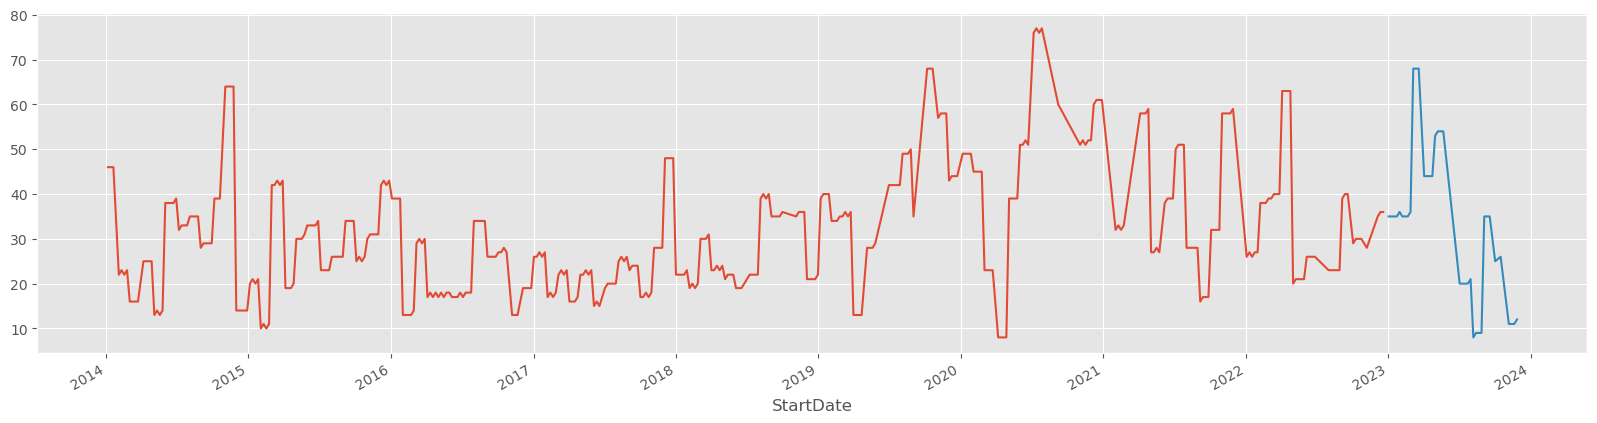

In [21]:
# Split the data into a train and test set
P15_train = P15.loc[:'2022']
P15_test = P15.loc['2023':]

# Create an axis
fig, ax = plt.subplots(figsize=(20,5))

# Plot the train and test sets on the axis ax
P15_train.plot(ax=ax)
P15_test.plot(ax=ax)
plt.show()

In [22]:
# Generate predictions
one_step_forecast = fitted.get_prediction(start=-12)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
#confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
#lower_limits = confidence_intervals.loc[:,'lower close']
#upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate  predictions
print(mean_forecast)

StartDate
2023-08-07    18.443247
2023-08-14     8.534436
2023-08-21    14.039566
2023-08-28     1.346224
2023-09-04     6.995106
2023-09-18    35.608922
2023-10-02    44.177826
2023-10-16    18.740240
2023-11-06    17.032741
2023-11-13    11.539155
2023-11-20    15.951497
2023-11-27     5.505223
Name: predicted_mean, dtype: float64


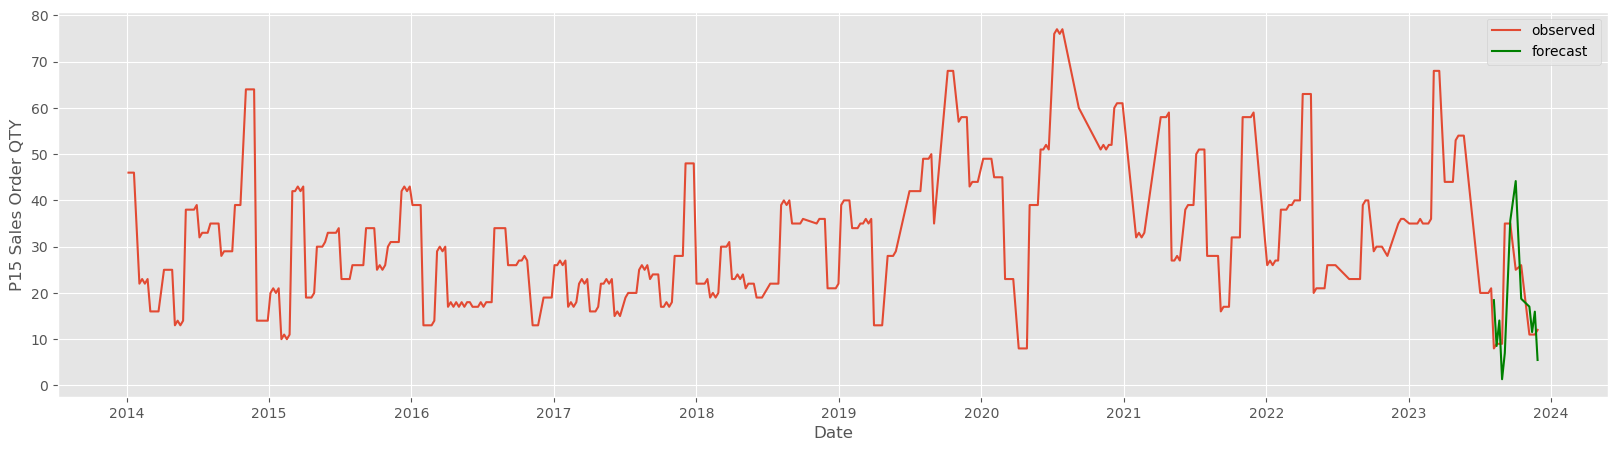

In [23]:
fig, ax = plt.subplots(figsize=(20,5))
plt.plot(P15.index, P15, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='g', label='forecast')

# shade the area between your confidence limits
#plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('P15 Sales Order QTY')
plt.legend()
plt.show()

In [24]:
# Generate predictions
next_step_forecast = fitted.get_forecast(steps = 4)

# Extract prediction mean
next_mean_forecast = next_step_forecast.predicted_mean

# Get confidence intervals of  predictions
#confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
#lower_limits = confidence_intervals.loc[:,'lower close']
#upper_limits = confidence_intervals.loc[:,'ubpper close']

# Print best estimate  predictions
dates=next_mean_forecast.index

C:\Users\PC10\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [25]:
next_mean_forecast

438    14.745931
439    15.228078
440    12.983233
441     3.444236
Name: predicted_mean, dtype: float64

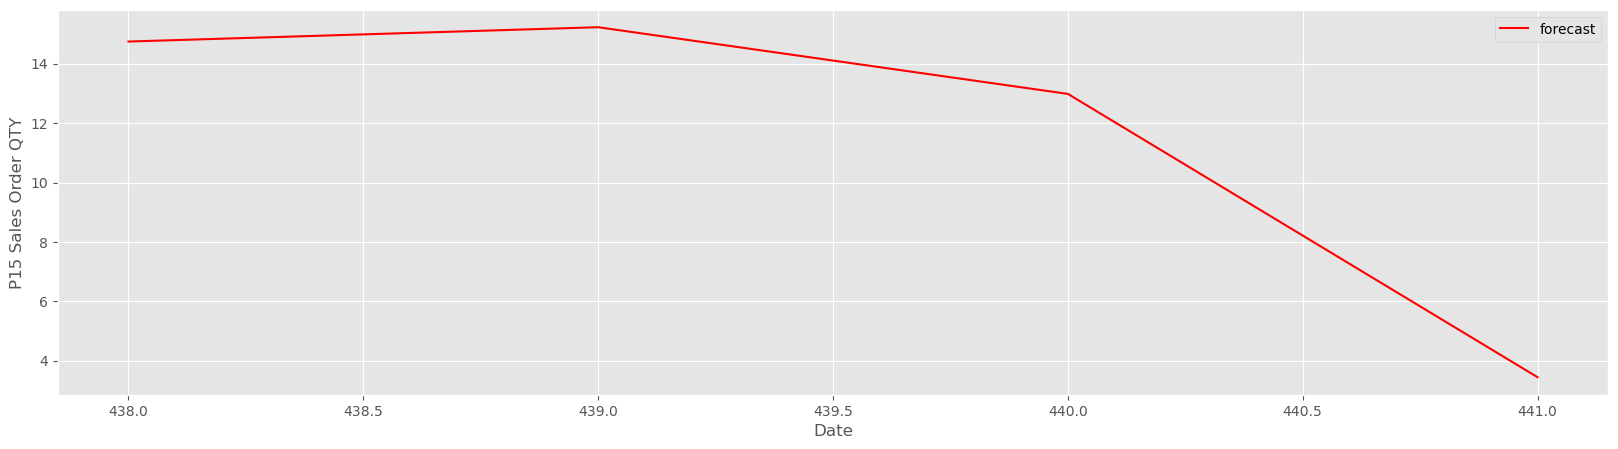

In [26]:
fig, ax = plt.subplots(figsize=(20,5))
#plt.plot(P15.index, P15, label='observed')

# plot your mean predictions
plt.plot(next_mean_forecast.index, next_mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
#plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('P15 Sales Order QTY')
plt.legend()
plt.show()

In [27]:
#lookin at our residual
residuals = fitted.resid
residuals

StartDate
2014-01-06    46.000000
2014-01-20     0.000000
2014-02-03   -24.000000
2014-02-10     1.000000
2014-02-17   -23.999610
                ...    
2023-10-16     7.259760
2023-11-06    -6.032741
2023-11-13    -0.539155
2023-11-20    -4.951497
2023-11-27     6.494777
Length: 438, dtype: float64

In [28]:
# how far our prediction from the real valuess
mae = np.mean(np.abs(residuals)) # Mean Absolute Error
mae

5.037209289592203

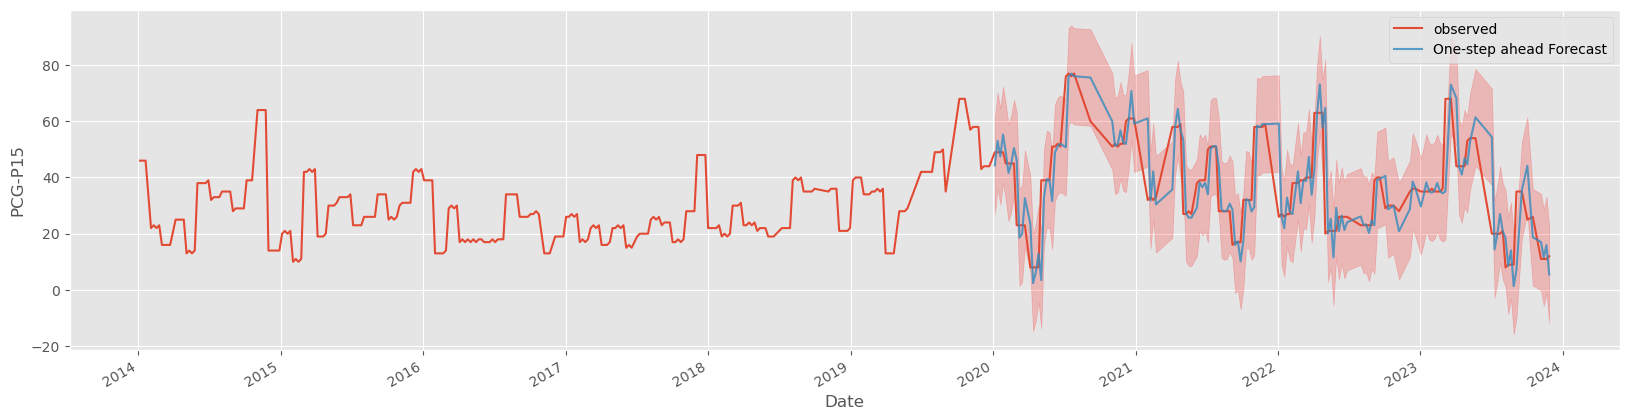

In [29]:
pred = fitted.get_prediction(start='2020',dynamic=False)
pred_ci = pred.conf_int()
ax = P15['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.8, figsize=(20, 5))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('PCG-P15')
plt.legend()
plt.show()

In [30]:
pred_ci

,lower PCG-P15,upper PCG-P15
StartDate,,
2020-01-06,27.114320,61.468549
2020-01-13,35.873618,70.227847
2020-01-20,30.331527,64.685756
2020-01-27,38.116417,72.470646
2020-02-03,31.864448,66.218677
...,...,...
2023-10-16,1.563125,35.917354
2023-11-06,-0.144373,34.209856
2023-11-13,-5.637959,28.716270


In [31]:
# calculate Mean-Squared Error (MSE) of the forecast

P15_forecasted = pred.predicted_mean
P15_truth = P15['2014-01-06':]
mse = ((P15_forecasted - P15_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 114.52


In [32]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 10.7


Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 12.56 of the real sales. Our weekly Sales Order unit range from around 0 to 80 unit.

**Producing and Visualizing Forecast**

In [33]:
# Get forecast 3 months ahead

pred_uc = fitted.get_forecast(steps = 12)
pred_ci = pred_uc.conf_int()

C:\Users\PC10\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [34]:
future_df = pd.DataFrame(pred_uc.predicted_mean)
future_df.column = ['Future_pred']
future_df

,predicted_mean
438,14.745931
439,15.228078
440,12.983233
441,3.444236
442,4.143987
443,4.448387
444,2.589078
445,-1.535703
446,-3.252098
447,-2.858913


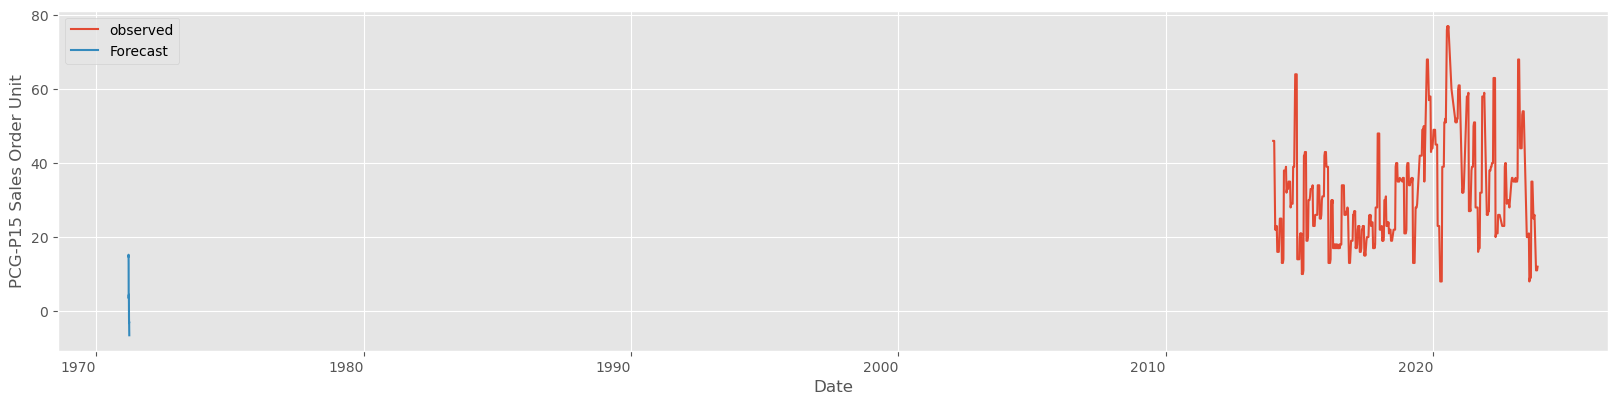

In [35]:
ax = P15.plot(label='observed', figsize=(20, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
#ax.fill_between(pred_ci.index,
                #pred_ci.iloc[:, 0],
                #pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('PCG-P15 Sales Order Unit')
plt.legend()
plt.show()